## Data Science Final Project Gaston Chevarria
### Water Quality Classification of the coastal zone of Buenos Aires 

This project has the purpose of carrying out a classification by the K-means and PCA method, of the water quality of the coastal strip of the Rio de la Plata.

The data comes from a set of quarterly samples (2013-2022) that measure the physicochemical and microbiological parameters of the coastal strip (Argentine side) of the Río de la Plata carried out by the Ministry of Environment and Sustainable Development in conjunction with the Municipalities that make up the Information Exchange Network of Local Governments (RIIGLO).

The sampling places are: Streams, Rivers, Spas, Canals, Coastal, Ports and Reserves, Beaches, water intakes, North Zone, Avellaneda, Quilmes, Ensenada, Berazategui and Berisso.



## Libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
#Importing data
data = pd.read_csv("Dataset_agua_Buenos_Aires.csv", sep=';',decimal=",", encoding='latin-1')
data.head(1)

,Sitios,Codigo,Tem_agua,Tem_aire,OD,pH,Olores,Color,Espumas,Mat_susp,...,NH4_mg_l,P_total_l_mg_l,Fosf_ortofos_mg_l,DBO_mg_l,DQO_mg_l,Turbiedad_NTU,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Clorofila_a_ug_l
0,Canales,TI001,24.5,23,5.3,6.56,Ausencia,Ausencia,Ausencia,Presencia,...,0.42,0.23,0.15,6.2,29.0,90.0,0.1,0.0,0.0,0.01


## Explore Data

In [3]:
#Types of data
data.dtypes

Sitios                      object
Codigo                      object
Tem_agua                   float64
Tem_aire                    object
OD                         float64
pH                         float64
Olores                      object
Color                       object
Espumas                     object
Mat_susp                    object
colif_totales_ufc_100ml    float64
escher_coli_ufc_100ml      float64
enteroc_ufc_100ml          float64
Nitrato_mg_l               float64
NH4_mg_l                   float64
P_total_l_mg_l             float64
Fosf_ortofos_mg_l          float64
DBO_mg_l                   float64
DQO_mg_l                   float64
Turbiedad_NTU              float64
Hidr_Deriv_Petr_ug_l       float64
Cr_total_mg_l              float64
Cd_total_mg_l              float64
Clorofila_a_ug_l           float64
dtype: object

We have Tem_aire is an object, then We will see if we can convert to froat or drop the column for this analysis.

In [4]:
#Describe the data
data.describe()

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,Fosf_ortofos_mg_l,DBO_mg_l,DQO_mg_l,Turbiedad_NTU,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Clorofila_a_ug_l
count,486.000000,487.000000,489.000000,5.590000e+02,6.090000e+02,5.540000e+02,634.000000,641.000000,155.000000,155.000000,342.000000,643.000000,344.000000,331.000000,343.000000,347.000000,342.000000
mean,19.921337,6.019979,7.575481,1.609713e+05,1.533155e+04,3.341267e+04,356.602603,1.471977,0.437355,1.454452,8.577193,31.191659,53.907267,67.882810,0.005084,0.001121,4.322512
std,5.285926,2.890456,0.656646,2.016214e+06,1.208514e+05,3.651558e+05,2123.851516,2.299068,0.287004,2.412096,5.878382,34.532339,40.851272,36.604735,0.002503,0.000735,8.876332
min,7.000000,0.200000,1.090000,4.000000e+00,1.000000e+00,2.000000e+00,0.200000,0.000000,0.080000,0.100000,1.900000,0.060000,3.900000,0.090000,0.000000,0.000000,0.000000
25%,15.200000,3.935000,7.320000,7.500000e+02,3.000000e+02,3.000000e+02,2.800000,0.200000,0.250000,0.250000,4.400000,0.835000,22.000000,49.000000,0.005000,0.001000,0.009000
50%,21.300000,6.120000,7.590000,4.000000e+03,9.000000e+02,1.100000e+03,5.400000,0.640000,0.350000,0.370000,7.000000,30.000000,49.000000,50.000000,0.005000,0.001000,0.010000
75%,24.400000,8.170000,7.860000,2.120000e+04,4.500000e+03,5.987500e+03,8.875000,1.600000,0.535000,0.735000,11.000000,42.000000,75.000000,100.000000,0.006000,0.001000,9.000000
max,28.800000,15.200000,9.660000,4.600000e+07,2.400000e+06,8.000000e+06,26137.000000,18.850000,1.600000,13.000000,32.000000,520.000000,340.000000,225.000000,0.019000,0.010000,84.000000


In [5]:
#Check the data

data.isnull()
data.isnull().sum()

Sitios                       0
Codigo                       0
Tem_agua                   168
Tem_aire                   383
OD                         167
pH                         165
Olores                     329
Color                      333
Espumas                    329
Mat_susp                   329
colif_totales_ufc_100ml     95
escher_coli_ufc_100ml       45
enteroc_ufc_100ml          100
Nitrato_mg_l                20
NH4_mg_l                    13
P_total_l_mg_l             499
Fosf_ortofos_mg_l          499
DBO_mg_l                   312
DQO_mg_l                    11
Turbiedad_NTU              310
Hidr_Deriv_Petr_ug_l       323
Cr_total_mg_l              311
Cd_total_mg_l              307
Clorofila_a_ug_l           312
dtype: int64

In [6]:
#We will drop the features: P_total and Fosf_ortosfos and Tem_aire
#because they have a lot of null values
data = data.drop(['P_total_l_mg_l'], axis=1)
data = data.drop(['Fosf_ortofos_mg_l'], axis=1)
data = data.drop(['Tem_aire'], axis=1)

In [7]:
#checking the distribution 
data.count()

Sitios                     654
Codigo                     654
Tem_agua                   486
OD                         487
pH                         489
Olores                     325
Color                      321
Espumas                    325
Mat_susp                   325
colif_totales_ufc_100ml    559
escher_coli_ufc_100ml      609
enteroc_ufc_100ml          554
Nitrato_mg_l               634
NH4_mg_l                   641
DBO_mg_l                   342
DQO_mg_l                   643
Turbiedad_NTU              344
Hidr_Deriv_Petr_ug_l       331
Cr_total_mg_l              343
Cd_total_mg_l              347
Clorofila_a_ug_l           342
dtype: int64

We have 643 samples in this dataset

In [8]:
#Completing the null values for (It depend in each case)
#Completing with the median in this case

data['Tem_agua'].fillna(data['Tem_agua'].dropna().median(), inplace=True)
data['pH'].fillna(data['pH'].dropna().median(), inplace=True)
data['Nitrato_mg_l'].fillna(data['Nitrato_mg_l'].dropna().median(), inplace=True)
data['NH4_mg_l'].fillna(data['NH4_mg_l'].dropna().median(), inplace=True)


In [9]:
#Eliminating null values in DQO column

# drop None Values
data = data[data['DQO_mg_l'].notna()]

In [10]:
#Completing the null values for conditional features DBO 
#with DBO and DQO relation 

for i in data["DQO_mg_l"]:
    if i<=50:
        data["DBO_mg_l"].fillna(10,inplace=True)
    elif 50>i<250:
        data["DBO_mg_l"].fillna(100,inplace=True)
    elif 250>i<1000:
        data["DBO_mg_l"].fillna(500,inplace=True)
    elif 1000>i<2000:
        data["DBO_mg_l"].fillna(3000,inplace=True)
    else:
        data["DBO_mg_l"].fillna(value=8000,inplace=True)
 

In [11]:
#Completing the null values for conditional features OD

for i in data["DBO_mg_l"]:
    if i<=10:
        data["OD"].fillna(6.54,inplace=True)
    elif 10>i<20:
        data["OD"].fillna(5.70,inplace=True)
    elif i>=20:
        data["OD"].fillna(5.38,inplace=True)
 

In [12]:
#Completing the null values for conditional features Coliformes

for i in data["escher_coli_ufc_100ml"]:
    if i<=10:
        data["colif_totales_ufc_100ml"].fillna(2159,inplace=True)
    elif 10>i<500:
        data["colif_totales_ufc_100ml"].fillna(9233,inplace=True)
    elif i>=500:
        data["colif_totales_ufc_100ml"].fillna(98500,inplace=True)

In [13]:
#Completing the null values for conditional features escherichia and Enteroc

for i in data["colif_totales_ufc_100ml"]:
    if i<=2000:
        data["escher_coli_ufc_100ml"].fillna(685,inplace=True)
    elif 2000>i<10000:
        data["escher_coli_ufc_100ml"].fillna(2194,inplace=True)
    elif i>=10000:
        data["escher_coli_ufc_100ml"].fillna(43643,inplace=True)

In [14]:
#Completing the null values for conditional features escherichia and Enteroc

for i in data["colif_totales_ufc_100ml"]:
    if i<=2000:
        data["enteroc_ufc_100ml"].fillna(4122,inplace=True)
    elif 2000>i<10000:
        data["enteroc_ufc_100ml"].fillna(6500,inplace=True)
    elif i>=10000:
        data["enteroc_ufc_100ml"].fillna(90695,inplace=True)

In [15]:
#We will drop the features: P_total and Fosf_ortosfos and Tem_aire
#because they have a lot of null values
data = data.drop(['Hidr_Deriv_Petr_ug_l'], axis=1)
data = data.drop(['Cd_total_mg_l'], axis=1)
data = data.drop(['Cr_total_mg_l'], axis=1)
data = data.drop(['Clorofila_a_ug_l'], axis=1)
data = data.drop(['Olores'], axis=1)
data = data.drop(['Color'], axis=1)
data = data.drop(['Espumas'], axis=1)
data = data.drop(['Mat_susp'], axis=1)

In [16]:
data = data.drop(['Turbiedad_NTU'], axis=1)

In [17]:
#Check the data with nullvalues again

data.isnull()
data.isnull().sum()

Sitios                     0
Codigo                     0
Tem_agua                   0
OD                         0
pH                         0
colif_totales_ufc_100ml    0
escher_coli_ufc_100ml      0
enteroc_ufc_100ml          0
Nitrato_mg_l               0
NH4_mg_l                   0
DBO_mg_l                   0
DQO_mg_l                   0
dtype: int64

In [18]:
#checking the distribution 
data.count()

Sitios                     643
Codigo                     643
Tem_agua                   643
OD                         643
pH                         643
colif_totales_ufc_100ml    643
escher_coli_ufc_100ml      643
enteroc_ufc_100ml          643
Nitrato_mg_l               643
NH4_mg_l                   643
DBO_mg_l                   643
DQO_mg_l                   643
dtype: int64

## Correlation Estimate

A good way to get an initial understanding of the relationship between the different variables is to explore how they correlate.

In [19]:
#correlation between our variables using corr method in the pandas library.
data.corr()

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
Tem_agua,1.000000,-0.173524,-0.200320,-0.116949,-0.003700,-0.106337,0.036464,-0.261159,0.065812,-0.015287
OD,-0.173524,1.000000,0.383844,-0.147803,-0.164785,-0.154325,0.026462,-0.348416,-0.065094,0.023255
pH,-0.200320,0.383844,1.000000,0.022174,-0.048639,0.012829,0.003586,-0.025821,0.072146,0.070531
colif_totales_ufc_100ml,-0.116949,-0.147803,0.022174,1.000000,0.145969,0.969923,-0.012860,0.122913,0.016032,0.082835
escher_coli_ufc_100ml,-0.003700,-0.164785,-0.048639,0.145969,1.000000,0.323165,-0.019646,0.132455,0.061552,0.083403
enteroc_ufc_100ml,-0.106337,-0.154325,0.012829,0.969923,0.323165,1.000000,-0.008720,0.106780,0.015409,0.097505
Nitrato_mg_l,0.036464,0.026462,0.003586,-0.012860,-0.019646,-0.008720,1.000000,0.015292,0.028973,0.130904
NH4_mg_l,-0.261159,-0.348416,-0.025821,0.122913,0.132455,0.106780,0.015292,1.000000,0.127072,0.109708
DBO_mg_l,0.065812,-0.065094,0.072146,0.016032,0.061552,0.015409,0.028973,0.127072,1.000000,-0.122334
DQO_mg_l,-0.015287,0.023255,0.070531,0.082835,0.083403,0.097505,0.130904,0.109708,-0.122334,1.000000


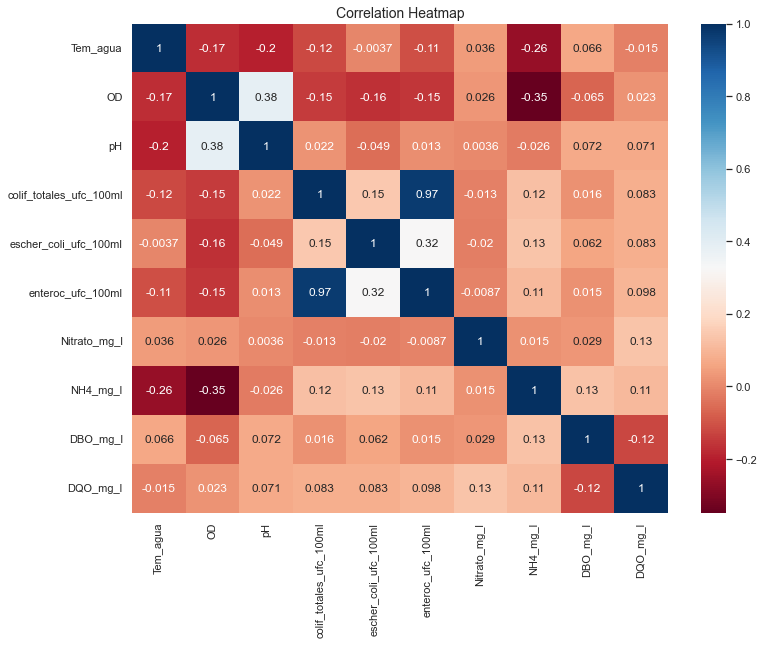

In [20]:
#Using Correlation Heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

Let’s explore the correlation.
We see that there is a strong correlation between <span class="mark">Coliformes, Enterobacterias and Escherichia</span>. In other words, if there are coliformes are the others bacterias. Is a fact that water is not good.

How about <span class="mark">DQO and DBO</span>?
There are correlation between them and Nitrato and NH4.
We have:
1. DQO/DB0 <2.5 Elevated biological fraction.
2. DQO/DBO between 2.5 and 4.0 mean biological fraction
3. DQO/DBO > 4.0 low-inert biological fraction

In the case of <span class="mark">OD</span>, we have correlation with Temperature of the water because (As the temperature increases, the amount of dissolved oxygen in the water decreases).

As the microbial load in the water increases, dissolved oxygen decreases considerably.

In the presence of oxygen, ammonium(NH4) can be converted to nitrate (nitrification). In the water, nitrification produces a high consumption of oxygen, and ammonium is also a fertilizer that promotes the growth of algae.

<span class="mark">NH4</span>, along with nitrites and nitrates, is the typical indicator of water pollution. The presence of ammonia indicates incomplete degradation of organic matter.

Nitrogenous compounds are of plant origin
Some waters, such as those from swampy lands, which contain peat, have a high content of ammonia of vegetable origin, and the waters of rivers or streams that have ammonia contents between 0.1 and 2 mg/l.

In some cases, the ammonia can come from the reduction of nitrites by bacterial action.

Ammonia, along with chlorine, is used in some water treatment plants for water disinfection.

The content of ammonia, organic matter, nitrites and bacteria that indicate faecal contamination are the best indicators of water quality.

The <span class="mark">pH</span> and dissolved oxygen vary seasonally in relation to the precipitation regime and the contribution of the wastewater, therefore, the more polluted the water with pH below or above will have variations on DO.

<span class="mark">Nitrate</span> is one of the most common groundwater contaminants in rural areas. It needs to be monitored in drinking water primarily because excessive levels can cause methemoglobinemia, or "blue baby disease."

Now, we understand our dataset and have a general idea of it.
Next section will be the segmentation. <span class="mark">But before that, we need to scale our data first.</span>

## Pre-Processing Data 

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means.
In general, We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].
This process is commonly referred to as Standardization.

In [21]:
data.head(1)

,Sitios,Codigo,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
0,Canales,TI001,24.5,5.3,6.56,2200.0,100.0,130.0,2.9,0.42,6.2,29.0


In [22]:
#We put the Codigo and Sitios columns as indexes
data.set_index(['Sitios','Codigo'], inplace = True)

In [23]:
data.head(1)

,,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
Sitios,Codigo,,,,,,,,,,
Canales,TI001,24.5,5.3,6.56,2200.0,100.0,130.0,2.9,0.42,6.2,29.0


## Standarization

Now that we cleared that up. It is time to perform standardization in Python.

In [38]:
# Standardizing data, so that all features have equal weight. 
#This is important for modelling.
# Otherwise, in our case Bacterias would be considered much more important the others. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [39]:
data_std = pd.DataFrame(data = data_std, columns = data.columns)

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

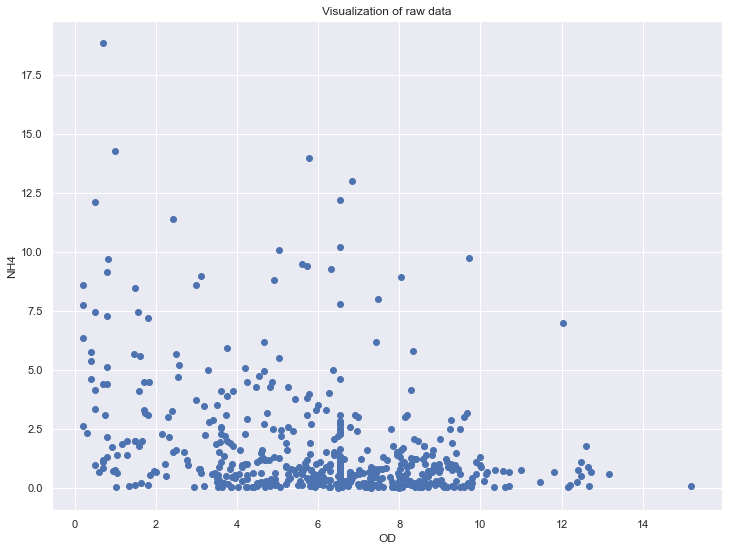

In [26]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros OD and NH4, 
#located on positions 1 and 7 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 1], data.iloc[:, 7])
plt.xlabel('OD')
plt.ylabel('NH4')
plt.title('Visualization of raw data')

## Building Our Segmentation Model

## K-Means Clustering

Before applying the K-Means algorithm we need to choose how many clusters we would like to have.
But How?
There are two components. Within Clusters Sum of Squares(WCSS) and Elbow Method.

In [27]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

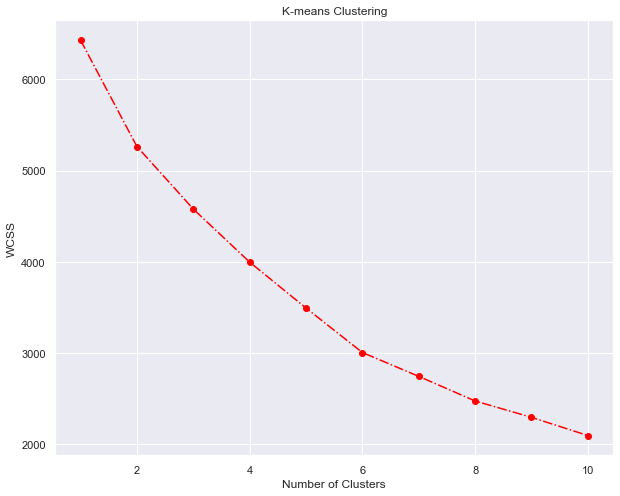

In [28]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

<span class="mark">The elbow in the graph is the six-cluster mark</span>. This is the only place until which the graph is steeply declining while smoothing out afterward.
Let’s perform K-Means clustering with 6 clusters.

In [29]:
# We run K-means with a fixed number of clusters. In our case 6.
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

#### Fitting Our Model to the Dataset

In [30]:
# We divide our data into the 6 clusters.
kmeans.fit(data_std)

KMeans(n_clusters=6, random_state=42)

We create a new data frame with the original features and add a new column with the assigned clusters for each point.

## Results

In [31]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= data_std.copy()
df_segm_kmeans = pd.DataFrame(data = data_std, columns = data.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [32]:
df_segm_kmeans.head()

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Segment K-means
0,0.919040,-0.332852,-1.790980,-0.080245,-0.120387,-0.085424,-0.165483,-0.455928,-0.700634,-0.063516,2
1,1.114592,-1.547311,-1.790980,-0.080777,-0.119536,-0.084627,-0.165293,-0.416511,-0.792866,-0.063516,2
2,0.940768,-1.272565,-1.738213,-0.080458,-0.119536,-0.084095,-0.163775,-0.617972,-1.692128,-0.063516,2
3,1.071136,-1.559257,-0.225541,-0.080671,-0.120387,-0.084922,-0.163348,-0.201911,-0.792866,-0.063516,2
4,0.832128,-2.037077,-2.089997,-0.080831,-0.120387,-0.084715,-0.162683,-0.617972,-1.530722,0.805911,2


In [33]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head(10)

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
Segment K-means,,,,,,,,,,
0,-0.756405,-1.189902,-0.226245,0.046225,0.144271,0.021795,-0.119987,1.691298,0.377559,-0.028901
1,-0.953022,1.156612,0.646453,-0.068591,-0.093713,-0.078932,-0.163526,-0.194602,-0.299358,-0.083811
2,0.533231,-0.095211,-0.171508,-0.063137,-0.086747,-0.066145,-0.104781,-0.366286,0.003140,0.006525
3,0.223744,-2.194360,-0.665271,3.001109,16.949270,5.831507,-0.163241,0.890796,0.175571,2.124542
4,-2.448798,-2.283951,0.565973,24.408421,-0.115405,23.530316,-0.161023,1.383500,0.175571,1.153682
5,0.223744,0.160896,0.020708,-0.078246,-0.119939,-0.055894,6.331333,-0.230014,0.175571,0.549913


#### Clusters explanation

0. Cluster 0: highest value of NH4 and high value of DBO, lowest value of DQO and average values of Bacterias, pH, OD and Temperature.
1. Cluster 1: highest value of OD, pH, and low values of Bacterias and NH4. Also have low values of DBO and DQO.
2. Cluster 2: highest value Temperature, and the other parameters are in the average.
3. Cluster 3: highest values of Escherichia Coli (also high values of bacterias), the lowest value of OD, and very highest values of DQO and DBO. NH4 in high level.
4. Cluster 4: lowest values of Temperature, OD, High pH. The wost values of Bacterias (highest in all of them) and values very high in NH4, DQO and DBO.
5. Cluster 5: highest values of Nitratos and DBO. And the lowest values of bacterias and NH4.

With all these facts, we can call our clusters as follows:

In [74]:
#We will use this clasification names
#Let’s label the segment according to their relevance. Rename
df_segm_analysis.rename({0:'Class 1: Biological Cont',
                         1:'Class 2: Incipient Cont',
                         2:'Class 3: Low Cont',
                         3:'Class 4: Severe Cont',
                         4:'Class 5: Very Severe Cont',
                         5:'Class 6: Chemical Cont'})

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
Segment K-means,,,,,,,,,,
Class 1: Biological Cont,-0.756405,-1.189902,-0.226245,0.046225,0.144271,0.021795,-0.119987,1.691298,0.377559,-0.028901
Class 2: Incipient Cont,-0.953022,1.156612,0.646453,-0.068591,-0.093713,-0.078932,-0.163526,-0.194602,-0.299358,-0.083811
Class 3: Low Cont,0.533231,-0.095211,-0.171508,-0.063137,-0.086747,-0.066145,-0.104781,-0.366286,0.003140,0.006525
Class 4: Severe Cont,0.223744,-2.194360,-0.665271,3.001109,16.949270,5.831507,-0.163241,0.890796,0.175571,2.124542
Class 5: Very Severe Cont,-2.448798,-2.283951,0.565973,24.408421,-0.115405,23.530316,-0.161023,1.383500,0.175571,1.153682
Class 6: Chemical Cont,0.223744,0.160896,0.020708,-0.078246,-0.119939,-0.055894,6.331333,-0.230014,0.175571,0.549913


In [75]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Class 1: Biological Cont',
                                                                  1:'Class 2: Incipient Cont',
                                                                  2:'Class 3: Low Cont',
                                                                  3:'Class 4: Severe Cont',
                                                                  4:'Class 5: Very Severe Cont',
                                                                  5:'Class 6: Chemical Cont'})

In [76]:
df_segm_kmeans.head()

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Segment K-means,Labels
0,0.919040,-0.332852,-1.790980,-0.080245,-0.120387,-0.085424,-0.165483,-0.455928,-0.700634,-0.063516,2,Class 3: Low Cont
1,1.114592,-1.547311,-1.790980,-0.080777,-0.119536,-0.084627,-0.165293,-0.416511,-0.792866,-0.063516,2,Class 3: Low Cont
2,0.940768,-1.272565,-1.738213,-0.080458,-0.119536,-0.084095,-0.163775,-0.617972,-1.692128,-0.063516,2,Class 3: Low Cont
3,1.071136,-1.559257,-0.225541,-0.080671,-0.120387,-0.084922,-0.163348,-0.201911,-0.792866,-0.063516,2,Class 3: Low Cont
4,0.832128,-2.037077,-2.089997,-0.080831,-0.120387,-0.084715,-0.162683,-0.617972,-1.530722,0.805911,2,Class 3: Low Cont


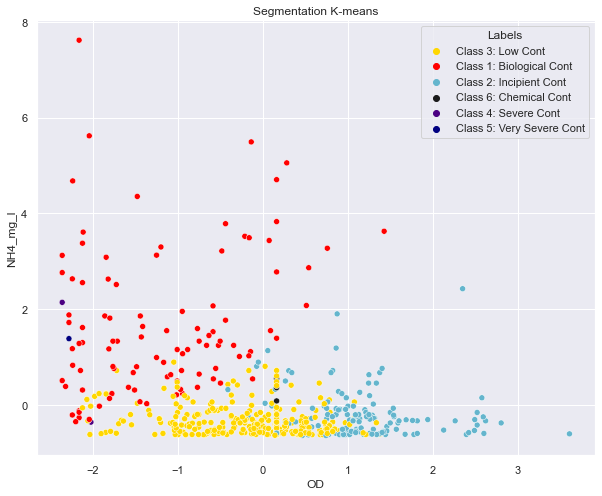

In [77]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['OD']
y_axis = df_segm_kmeans['NH4_mg_l']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['gold', 'red', 'c', 'k', 'indigo', 'navy'])
plt.title('Segmentation K-means')
plt.show()

We can see the red segment Class 1 is clearly separated as it is lowest in OD and highest NH4 values. But the others are grouped together.

We can conclude that K-Means did a decent job! However, it’s hard to separate segments from each other.

In the next section, we will combine PCA and K-Means to try to get a better result.

## PCA with K-Means for Better Visualization

What we will do here is apply dimensionality reduction to simplify our problem.
We will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means. So that We aim to see a nice and clear plot for our segmented groups.

In [40]:
# Employ PCA to find a subset of components, 
#which explain the variance in the data.
pca = PCA()

In [41]:
# Fit PCA with our standardized data. 
#We have to take the data_std from the scaler again

pca.fit(data_std)

PCA()

Now, Let’s see the explained variance ratio by each component

In [42]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.22419955, 0.15574289, 0.1240967 , 0.1153239 , 0.10629519,
       0.09160394, 0.07942728, 0.06046378, 0.04160178, 0.00124499])

We observe that the first component explains around 22 % of the variability of the data. The second one is 15 % and so on.
We now can plot the acumulative sum of explained variance.

##### Component variability visualization

Text(0, 0.5, 'Cumulative Explained Variance')

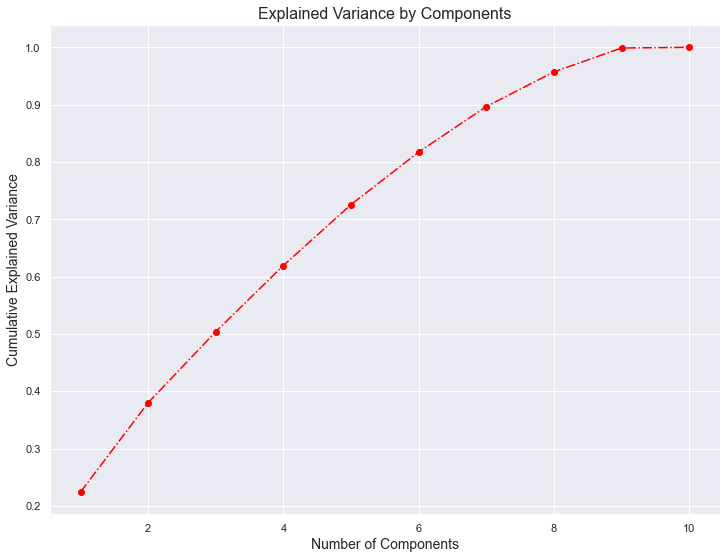

In [43]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
### Range is 11 because have 10 variances ratios
plt.figure(figsize = (12,9))
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

Well, <span class="girk">How do we choose the right number of components?</span> The answer is there is no right or wrong answer for that.
But, <span class="mark">a rule of thumb is to keep at least 70 to 80 percent of the explained variance</span>.
80 % of the variance of the <span class="girk">data is explained by the first 6 components</span>. Let’s keep the first 6 components for our further analysis.

In [44]:
# We choose 6 components. 
# 6 seems the right choice according to the previous graph.
pca = PCA(n_components = 6)

In [45]:
#Fit the model the our data with the selected number of components. 
#In our case 6.
pca.fit(data_std)

PCA(n_components=6)

## PCA Results

In [46]:
# The components attribute shows the loadings of each component on 
#each of the ten original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.11863125, -0.26127687, -0.05234402,  0.59495584,  0.30629738,
         0.61878768, -0.00758538,  0.25961721,  0.0495005 ,  0.11968068],
       [-0.4031702 ,  0.59743085,  0.58900264,  0.17940776, -0.1162446 ,
         0.16023772,  0.02721067, -0.16533209, -0.11278378,  0.14640589],
       [ 0.49238386,  0.14152539, -0.17388145,  0.25421424, -0.05412836,
         0.25883222, -0.07462846, -0.69918164, -0.24914598, -0.12746363],
       [ 0.11664862, -0.02743087, -0.12041994, -0.07335481,  0.04158085,
        -0.05353421,  0.54148181,  0.02368774, -0.4258498 ,  0.69717442],
       [ 0.34876596,  0.08849954,  0.24086127,  0.01292769,  0.12620804,
         0.03879887,  0.52924635, -0.09860369,  0.71062826,  0.00990558],
       [ 0.1737054 ,  0.09707191,  0.18626635, -0.23477362,  0.74860325,
        -0.08099877, -0.44895712, -0.09636216,  0.03203807,  0.30289842]])

The result is a 6 by 10 array(features). <span class="girk">We reduced our features to 6 components from the original 10 values</span> that explain the shape the values themselves show the so-called <span class="mark">loadings</span>.
Hey, just a minute, what is loading then?
<span class="mark">Loadings are correlations between an original variable and the component</span>.

For instance, the first value of the array shows the loading of the first feature on the first component (Example. Tem_agua with First component).
 
Columns are 10 original features and rows are 6 components that PCA gave us.

##### Creating a new PCA data 

In [47]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns,
                           index = ['Component 1', 'Component 2', 
                                    'Component 3','Component 4',
                                   'Component 5', 'Component 6'])
df_pca_comp

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
Component 1,-0.118631,-0.261277,-0.052344,0.594956,0.306297,0.618788,-0.007585,0.259617,0.049501,0.119681
Component 2,-0.403170,0.597431,0.589003,0.179408,-0.116245,0.160238,0.027211,-0.165332,-0.112784,0.146406
Component 3,0.492384,0.141525,-0.173881,0.254214,-0.054128,0.258832,-0.074628,-0.699182,-0.249146,-0.127464
Component 4,0.116649,-0.027431,-0.120420,-0.073355,0.041581,-0.053534,0.541482,0.023688,-0.425850,0.697174
Component 5,0.348766,0.088500,0.240861,0.012928,0.126208,0.038799,0.529246,-0.098604,0.710628,0.009906
Component 6,0.173705,0.097072,0.186266,-0.234774,0.748603,-0.080999,-0.448957,-0.096362,0.032038,0.302898


##### Correlation Heatmap

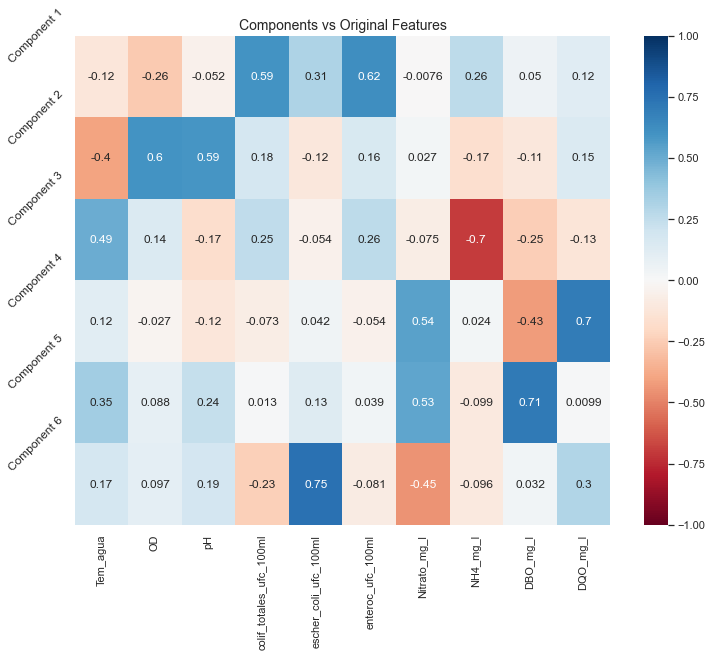

In [48]:
# Heat Map for Principal Components against original features. 
#Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4, 5], 
           ['Component 1', 'Component 2', 
            'Component 3','Component 4',
            'Component 5', 'Component 6'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

#### Component explanation

1. Comp 1: High level of biological contamination: Highest values of bacterias and NH4. Lowest level of OD.
2. Comp 2: Incipient contamination: Highest level of OD and pH. Low level of Bacterias, NH4 and DBO.
3. Comp 3: Low contamination: Lowest levels of NH4, DBO, DQO, and avg values of Bacterias and OD.
4. Comp 4: High level of Chemical contamination: Highest level of DQO, Nitratos and surely lowest values of DBO and OD.
5. Comp 5: Water with Biological and Chemical Contamination: Highest level of DBO and Nitratos. Lowest level in DQO and very low in OD.
6. Comp 6: Water with biological danger: highest values in Escherichia coli.

In [49]:
pca.transform(data_std)

array([[-0.22518386, -1.49777024,  1.1946201 ,  0.49113561, -0.70099494,
        -0.19408851],
       [ 0.07503128, -2.29834275,  1.11446059,  0.5876054 , -0.80946956,
        -0.28415045],
       [-0.07520417, -1.89812578,  1.42359182,  0.9323871 , -1.45141705,
        -0.28804266],
       ...,
       [ 0.80120282, -0.17134284, -1.92508985, -0.35932319, -0.82242602,
        -0.5086539 ],
       [ 1.80618952, -0.80418106, -3.31523828,  0.59669872, -1.01460823,
        -0.42169138],
       [ 1.12614045, -0.12719724, -2.7255443 ,  0.0341619 , -0.8015023 ,
        -0.33398065]])

In [50]:
scores_pca = pca.transform(data_std)

## K-Means Clustering with PCA

Our new dataset is ready! It’s time to apply K-Means to our brand new dataset with 6 components.

In [51]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

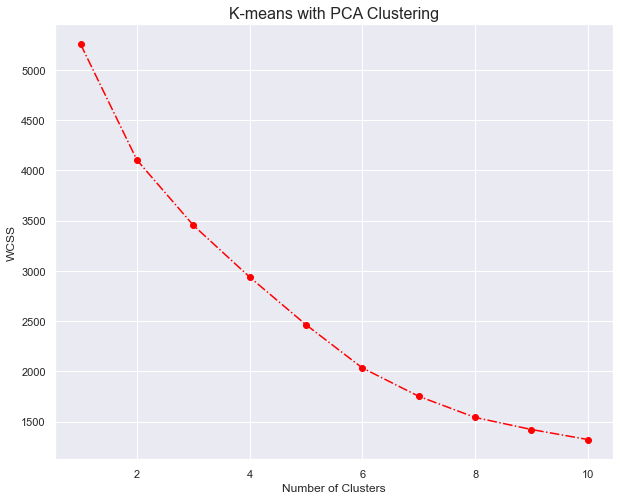

In [52]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

<span class="mark">We see that the optimal cluster number by within sum of square is 6.</span>

In [53]:
# We have chosen 6 clusters, so we run K-means with number of clusters equals 6. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [54]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=6, random_state=42)

K-Means algorithm has learnt from our new components and created 6 clusters . 

## K-Means Clustering with PCA Results

In [55]:
# We create a new data frame with the original features and 
# add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3',
                                          'Component 4', 'Component 5', 'Component 6']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [56]:
df_segm_pca_kmeans.head()

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,24.5,5.30,6.56,2200.0,100.0,130.0,2.9,0.42,6.2,29.0,-0.225184,-1.497770,1.194620,0.491136,-0.700995,-0.194089,0
1,25.4,2.25,6.56,1200.0,200.0,400.0,3.3,0.51,5.8,29.0,0.075031,-2.298343,1.114461,0.587605,-0.809470,-0.284150,0
2,24.6,2.94,6.59,1800.0,200.0,580.0,6.5,0.05,1.9,29.0,-0.075204,-1.898126,1.423592,0.932387,-1.451417,-0.288043,0
3,25.2,2.22,7.45,1400.0,100.0,300.0,7.4,1.00,5.8,29.0,0.056685,-1.401268,0.668979,0.400463,-0.468877,-0.023461,0
4,24.1,1.02,6.39,1100.0,100.0,370.0,8.8,0.05,2.6,59.0,0.267016,-2.409223,1.171746,1.521071,-1.517944,-0.179123,0


In [57]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Segment K-means PCA,,,,,,,,,,,,,,,,
0,22.569673,5.934408,7.467834,3.411048e+04,3.977204e+03,6.468267e+03,187.359723,0.621030,9.174055,29.170312,-0.236483,-0.323818,0.514002,0.003005,0.089808,0.049912
1,16.675728,3.238252,7.452524,2.334723e+05,3.073338e+04,3.549999e+04,96.080874,5.262524,10.753398,29.334757,0.929989,-0.836095,-1.736377,-0.243642,-0.389402,-0.306384
2,16.067000,9.164846,8.017538,2.395085e+04,2.994038e+03,2.612185e+03,7.275615,0.982631,8.159231,31.762638,-0.429218,1.590861,-0.227261,-0.203355,-0.284185,0.143729
3,21.300000,0.625000,7.200000,5.790000e+06,2.004500e+06,2.004500e+06,7.625000,3.495000,10.000000,104.500000,11.662586,-2.150918,0.344968,1.677958,2.099364,11.849884
4,9.000000,0.400000,7.900000,4.600000e+07,6.850000e+02,8.000000e+06,12.300000,4.620000,10.000000,71.000000,30.411642,8.035044,9.528124,-2.670971,0.208618,-7.970379
5,21.570000,6.282000,7.588000,4.875600e+03,1.062940e+03,1.174000e+04,14088.108000,1.150000,10.000000,104.500000,0.015648,0.412825,-0.588590,4.965332,3.699137,-2.267162


Above we see our data grouped by K-Means Segment. We can also convert segment numbers to the label and see the observation number and proportions of each segment by total observation.

In [58]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Tem_agua']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Low Contamination', 
                                                          1:'Chemical and Biological Contamination',
                                                          2:'Incipient contamination', 
                                                          3:'Water Biological Danger',
                                                          4:'High level of Biological Contamination',
                                                          5:'High level Chemical Contamination'})
df_segm_pca_kmeans_freq

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,
Low Contamination,22.569673,5.934408,7.467834,3.411048e+04,3.977204e+03,6.468267e+03,187.359723,0.621030,9.174055,29.170312,-0.236483,-0.323818,0.514002,0.003005,0.089808,0.049912,397,0.617418
Chemical and Biological Contamination,16.675728,3.238252,7.452524,2.334723e+05,3.073338e+04,3.549999e+04,96.080874,5.262524,10.753398,29.334757,0.929989,-0.836095,-1.736377,-0.243642,-0.389402,-0.306384,103,0.160187
Incipient contamination,16.067000,9.164846,8.017538,2.395085e+04,2.994038e+03,2.612185e+03,7.275615,0.982631,8.159231,31.762638,-0.429218,1.590861,-0.227261,-0.203355,-0.284185,0.143729,130,0.202177
Water Biological Danger,21.300000,0.625000,7.200000,5.790000e+06,2.004500e+06,2.004500e+06,7.625000,3.495000,10.000000,104.500000,11.662586,-2.150918,0.344968,1.677958,2.099364,11.849884,2,0.003110
High level of Biological Contamination,9.000000,0.400000,7.900000,4.600000e+07,6.850000e+02,8.000000e+06,12.300000,4.620000,10.000000,71.000000,30.411642,8.035044,9.528124,-2.670971,0.208618,-7.970379,1,0.001555
High level Chemical Contamination,21.570000,6.282000,7.588000,4.875600e+03,1.062940e+03,1.174000e+04,14088.108000,1.150000,10.000000,104.500000,0.015648,0.412825,-0.588590,4.965332,3.699137,-2.267162,10,0.015552


We obtained columns and changed the name with a few line of codes.Now, Let’s plot the our new segments and see differences.

In [59]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Low Contamination', 
                                                          1:'Chemical and Biological Contamination',
                                                          2:'Incipient contamination', 
                                                          3:'Water Biological Danger',
                                                          4:'High level of Biological Contamination',
                                                          5:'High level Chemical Contamination'})

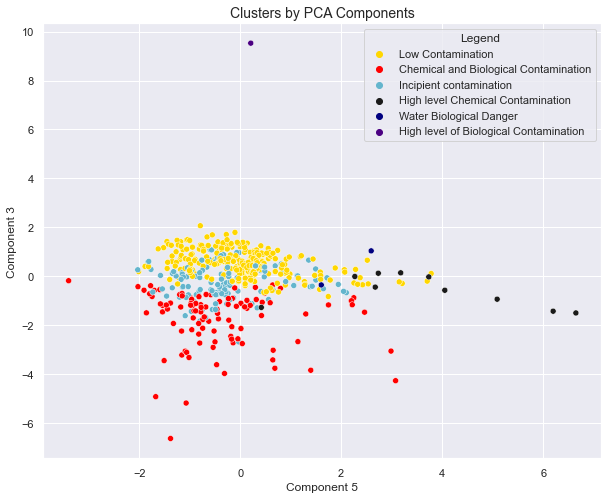

In [60]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 5']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['gold', 'red', 'c', 'k', 'navy', 'indigo'])
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()

When we plotted the K means clustering solution without PCA, we were only able to distinguish the green segment, but the division based on the components is much more pronounced.
That was one of the biggest goals of PCA to reduce the number of variables by combining them into bigger ones.



## Final Analysis of places

We segmented our samples into 6 groups. 

We will analize the segmentation of the water quality in each place of "Rio de la Plata"


In [61]:
df_segm_pca_kmeans.head()

,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA,Legend
0,24.5,5.30,6.56,2200.0,100.0,130.0,2.9,0.42,6.2,29.0,-0.225184,-1.497770,1.194620,0.491136,-0.700995,-0.194089,0,Low Contamination
1,25.4,2.25,6.56,1200.0,200.0,400.0,3.3,0.51,5.8,29.0,0.075031,-2.298343,1.114461,0.587605,-0.809470,-0.284150,0,Low Contamination
2,24.6,2.94,6.59,1800.0,200.0,580.0,6.5,0.05,1.9,29.0,-0.075204,-1.898126,1.423592,0.932387,-1.451417,-0.288043,0,Low Contamination
3,25.2,2.22,7.45,1400.0,100.0,300.0,7.4,1.00,5.8,29.0,0.056685,-1.401268,0.668979,0.400463,-0.468877,-0.023461,0,Low Contamination
4,24.1,1.02,6.39,1100.0,100.0,370.0,8.8,0.05,2.6,59.0,0.267016,-2.409223,1.171746,1.521071,-1.517944,-0.179123,0,Low Contamination


In [62]:
#We agg the feature "Sitios" to the new segmentation data
df_reset = data.reset_index()
df_reset.head(1)

,Sitios,Codigo,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l
0,Canales,TI001,24.5,5.3,6.56,2200.0,100.0,130.0,2.9,0.42,6.2,29.0


In [63]:
extracted_col = df_reset["Sitios"]

Results = df_segm_pca_kmeans.join(extracted_col) 
print("Second dataframe after adding column from first dataframe:")
display(Results)

Second dataframe after adding column from first dataframe:


,Tem_agua,OD,pH,colif_totales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,Nitrato_mg_l,NH4_mg_l,DBO_mg_l,DQO_mg_l,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA,Legend,Sitios
0,24.5,5.30,6.56,2200.0,100.0,130.0,2.90,0.42,6.2,29.0,-0.225184,-1.497770,1.194620,0.491136,-0.700995,-0.194089,0,Low Contamination,Canales
1,25.4,2.25,6.56,1200.0,200.0,400.0,3.30,0.51,5.8,29.0,0.075031,-2.298343,1.114461,0.587605,-0.809470,-0.284150,0,Low Contamination,Rios
2,24.6,2.94,6.59,1800.0,200.0,580.0,6.50,0.05,1.9,29.0,-0.075204,-1.898126,1.423592,0.932387,-1.451417,-0.288043,0,Low Contamination,Canales
3,25.2,2.22,7.45,1400.0,100.0,300.0,7.40,1.00,5.8,29.0,0.056685,-1.401268,0.668979,0.400463,-0.468877,-0.023461,0,Low Contamination,Rios
4,24.1,1.02,6.39,1100.0,100.0,370.0,8.80,0.05,2.6,59.0,0.267016,-2.409223,1.171746,1.521071,-1.517944,-0.179123,0,Low Contamination,Rios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,13.0,4.20,8.10,270000.0,685.0,70000.0,9.45,5.10,10.0,57.0,0.930466,0.582660,-2.234379,0.107035,-0.518086,-0.137590,1,Chemical and Biological Contamination,Balnearios
639,12.0,1.60,7.60,2300.0,685.0,800.0,9.32,1.77,10.0,20.0,0.554613,-0.440424,-1.267693,-0.544772,-0.773934,-0.573870,1,Chemical and Biological Contamination,Reservas y Puertos
640,11.0,1.70,7.80,43000.0,685.0,13000.0,7.53,3.29,10.0,32.0,0.801203,-0.171343,-1.925090,-0.359323,-0.822426,-0.508654,1,Chemical and Biological Contamination,TOMA DE AGUA
641,12.0,0.20,7.70,310000.0,685.0,80000.0,3.04,7.77,10.0,75.0,1.806190,-0.804181,-3.315238,0.596699,-1.014608,-0.421691,1,Chemical and Biological Contamination,Arroyos


In [68]:
#We group the data to see the quality clasification  in each place and time 


Report = Results.groupby(by =["Sitios", "Legend"])['OD'].count()

In [73]:
display(Report)

Sitios              Legend                                
Arroyos             Chemical and Biological Contamination     16
                    Incipient contamination                    8
                    Low Contamination                         26
Avellaneda          Chemical and Biological Contamination      1
                    High level Chemical Contamination          2
                    Low Contamination                         33
Balnearios          Chemical and Biological Contamination      2
                    Incipient contamination                   11
                    Low Contamination                          7
Berazategui         High level Chemical Contamination          2
                    Incipient contamination                    3
                    Low Contamination                         16
Berisso             Chemical and Biological Contamination     11
                    Incipient contamination                    9
                    Low Contami

### Conclusions 

The segmentation in this case helps to quickly verify the quality of the water, and to be able to take immediate actions to correct the quality at that site or repeat the samples and make a complaint to the authorities of Buenos Aires.
